<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 5

## Conceptual

### Question 1
Using basic statistical properties of the variance, as well as single-variable calculus, derive (5.6):

$$\alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}$$

In other words, prove that $α$ given by (5.6) does indeed minimize $\text{Var}(αX + (1 − α)Y)$.

#### Answer
For context, this example is used in section 5.2: we are investing some proportion of our money, $\alpha$, into investment with expected return $X$ and the rest of our money, $1 - \alpha$ into investment with expected return $Y$--so we are investing like $\alpha X + (1-\alpha)Y$; we wish to minimize our risk, which is to say *minimize the variance* of our return.

To this, we need a expression for the variance of our return.  For this, we'll need to use 3 rules:

1. $\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) + 2\text{Cov}(X,Y)$
2. $\text{Var}(aX) = a^2Var(X)$
3. $\text{Cov}(aX, bY) = ab\text{Cov}(X, Y)$

$$
\begin{aligned}
\text{Var}(\alpha X + (1-\alpha)Y)
&= \text{Var}(\alpha X) + \text{Var}((1-\alpha)Y) + 2\text{Cov}(\alpha X, (1-\alpha)Y) \\
&= \alpha^2 \text{Var}(X) + (1-\alpha)^2\text{Var}(Y) + 2(\alpha \times (1-\alpha))\text{Cov}(X,Y) \\
&= \alpha^2 \sigma^2_X + (1 - 2\alpha + \alpha^2) \sigma^2_Y + 2(\alpha - \alpha^2)\sigma_{XY} \\
&= \alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y +
     2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY}
\end{aligned}
$$

Next, we need to find the derivative of this expression with respect to $\alpha$, set it equal to zero (checking to make sure that the 0-point represents a minimum), and solve for $\alpha$.

$$
\begin{aligned}
\frac{d}{d\alpha}[\alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y +
     2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY}] \\
     &= 2\alpha \sigma^2_X - 2\sigma^2_Y + 2\alpha\sigma^2_Y + 2\sigma_{XY} - 4\alpha\sigma_{XY} \\
     &= \alpha \sigma^2_X - \sigma^2_Y + \alpha\sigma^2_Y + \sigma_{XY} - 2\alpha\sigma_{XY} \overset{set}= 0\
\end{aligned}$$

Separating the $\alpha$ terms and then solving for $\alpha$,

$$
\begin{aligned}
& \alpha \sigma^2_X + \alpha\sigma^2_Y - 2\alpha\sigma_{XY} = \sigma^2_Y - \sigma_{XY} \\
&= \alpha(\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}) \\
&\rightarrow \alpha = \frac{\sigma^2_Y - \sigma_{XY}}{\sigma^2_X + \sigma^2_Y - 2\sigma_{XY}}
\end{aligned}
$$

Finally, let us check that we've found a minimum by applying the second derivative.

$$
\begin{aligned}
& \frac{d^2}{d\alpha^2}[\alpha^2\sigma^2_X + \sigma^2_Y - 2\alpha\sigma^2_Y + \alpha^2\sigma^2_Y + 2\alpha\sigma_{XY} - 2\alpha^2\sigma_{XY}] \\
     &= \frac{d}{d\alpha}[\alpha \sigma^2_X - \sigma^2_Y + \alpha\sigma^2_Y + \sigma_{XY} - 2\alpha\sigma_{XY}] \\
     &= \sigma^2_X + \sigma^2_Y - 2\sigma_{XY} \\
     &= \text{Var}(X,Y) \\
\end{aligned}$$

Since variance is always $\ge$ 0, the second derivative is positive, which means that we have found a minimum.

### Question 2
We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of $n$ observations.

> (a) What is the probability that the first bootstrap observation is not the $j^{th}$ observation from the original sample? Justify your answer.

> (b) What is the probability that the second bootstrap observation is not the $j^{th}$ observation from the original sample?

> (c) Argue that the probability that the $j^{th}$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.

> (d) When $n = 5$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

> (e) When $n = 100$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

> (f) When $n = 10, 000$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?

> (g) Create a plot that displays, for each integer value of $n$ from $1$ to $100,000$, the probability that the $j^th$ observation is in the bootstrap sample. Comment on what you observe.

> (h) We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ contains the $j^{th}$ observation. Here $j = 4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

>> ```
> store <- rep (NA, 10000)
for (i in 1:10000){
  store[i] <- sum (sample (1:100, rep =TRUE) == 4) > 0
  }
> mean (store)
```

> Comment on the results obtained.

#### Answer to Question 2 a
***What is the probability that the first bootstrap observation is not the $j^{th}$ observation from the original sample? Justify your answer.***

With $n$ observations, the probability that any single bootstrap draw will be the $j^{th}$ observation is $\frac{1}{n}$.  Hence, the probability that any single bootstrap draw will NOT be the $j^{th}$ observation is $1 - \frac{1}{n}$.

#### Answer to Question 2 b
***What is the probability that the second bootstrap observation is not the $j^{th}$ observation from the original sample?***

The answer here is the same as for part a, $1 - \frac{1}{n}$.  One might be tempted to try to account for the first bootstrap sample, but bootstrapping replaces each draw before the next draw; hence, each bootstrap draw is independent of all other draws.

#### Answer to Question 2 c
***Argue that the probability that the $j^{th}$ observation is not in the bootstrap sample is $(1 − 1/n)^n$.***

As we've established, the probability that observation $j$ is not drawn on any single bootstrap draw is $1 - \frac{1}{n}$.  So if we draw $n$ times, we need to multiple this probability $n$ times.  Hence, we get that the probability that no draw for a bootstrap sample was for the $j^{th}$ observation is $(1 - \frac{1}{n})^n$.

#### Answer to Question 2 d-f
***When $n = 5, 100, 10,000$, what is the probability that the $j^{th}$ observation is in the bootstrap sample?***

For any value $n$, since the probability of observation $j$ NOT being contained in a bootstrap sample of size $n$ is $(1 - \frac{1}{n})^n$, the probability of *being* in the sample is the complement of this: $1 - (1 - \frac{1}{n})^n$.

|n|p|
|-|-|
|5|67.23%|
|100|63.40%|
10,000|63.21%|

In [ ]:
n <- c(5, 100, 10000)
(p_any <- round(1-(1 - 1/n)^n, 4))

[1] 0.6723 0.6340 0.6321

So that answers the prbability of observation $j$ being contained in our bootstrap sample *at all*.  We could similarly ask ***for $k \in [1,n]$, what is the probability that the $j^{th}$ observation is drawn $k$ times?***

For any draw, the probability of observation $j$ being drawn is distributed as a Bernoulli random variable, $j \sim \text{Bernoulli}(\frac{1}{n})$.  With $n$ draws, the distribution for drawing $j$ $k$ times is binomial like $X_j \sim \text{Binomial}(n, \frac{1}{n})$.

Now, the probability of drawing $j$ $k$ times is
$$p(X=k) = \frac{n!}{k!(n-k)!} \left(\frac{1}{n}\right)^k \left(1 - \frac{1}{n} \right)^{n-k}$$

Let's plot what this looks like for $n=10$.

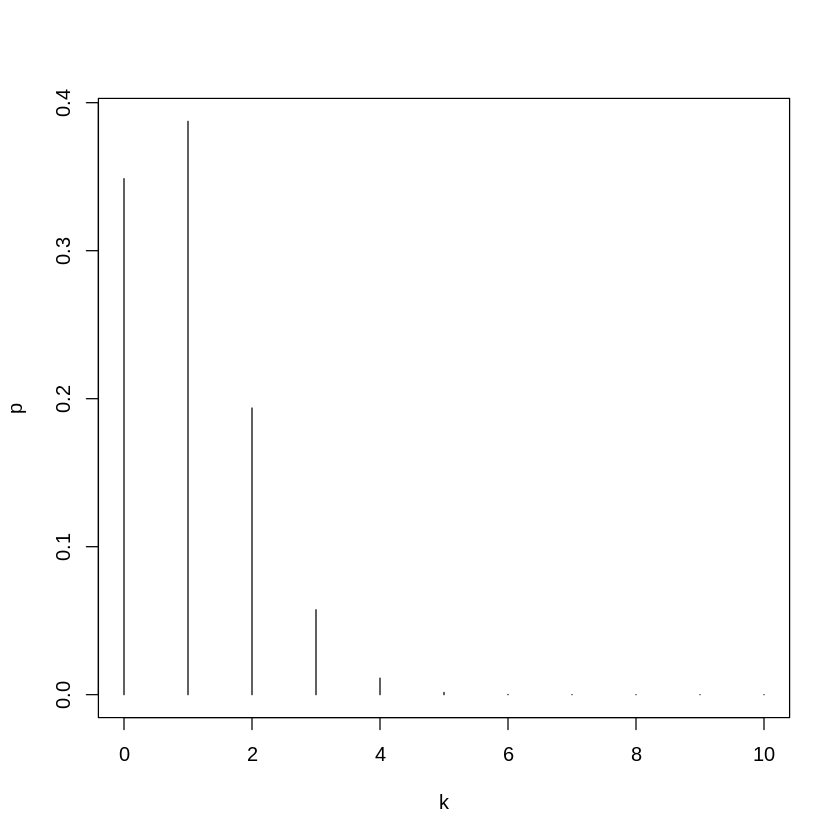

In [ ]:
n <- 10
X <- 0:n

p_k <- data.frame("k" = X,
                  "p" = dbinom(x=X, size=n, prob=1/n))

plot(p ~ k, data=p_k, type="h")

In [ ]:
p_k

k,p
<int>,<dbl>
0,0.3486784401
1,0.3874204890
2,0.1937102445
3,0.0573956280
4,0.0111602610
5,0.0014880348
6,0.0001377810
7,0.0000087480
8,0.0000003645


We can go further, asking ***What is the expected number of times we draw observation $j$ in a bootstrap sample of size $n$ ($E[X]$)?  What is the variance $V[X]$)?***

$$E[X] = np = n \frac{1}{n} = 1$$
$$V[X] = np(1-p) = n \frac{1}{n} \left(1 - \frac{1}{n} \right) = 1\left(1 - \frac{1}{n} \right) = \left(1 - \frac{1}{n} \right)$$

So if $n=10$, $E[X] = 1$ and $V[X] = \frac{9}{10}$.

#### Answer to Question 2 g
***Create a plot that displays, for each integer value of  $n$  from  1  to  100,000, the probability that the $j^{th}$  observation is in the bootstrap sample. Comment on what you observe.***

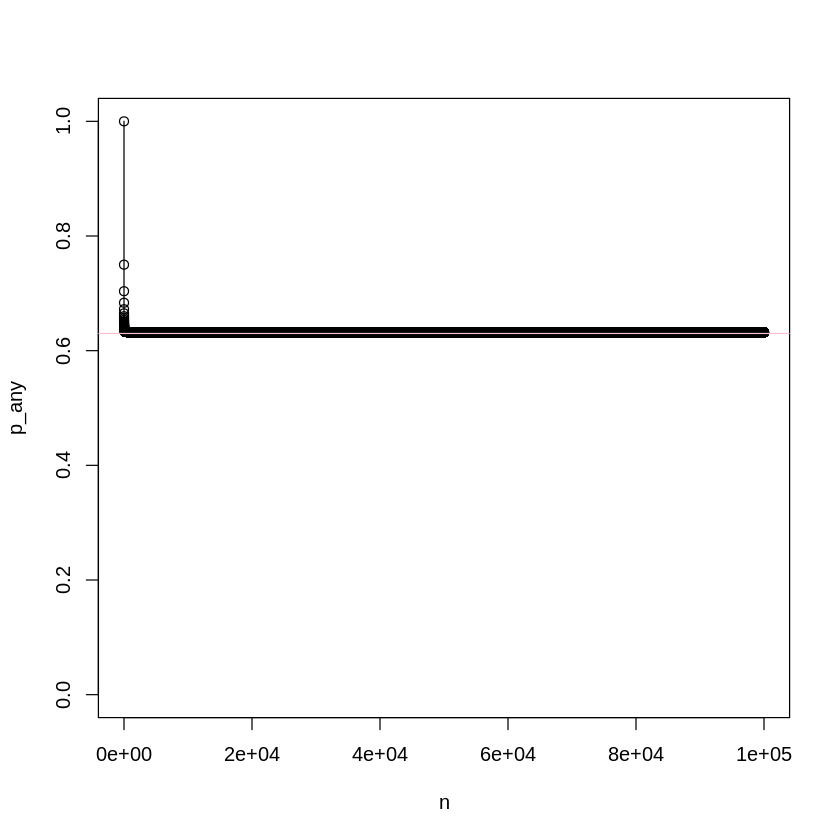

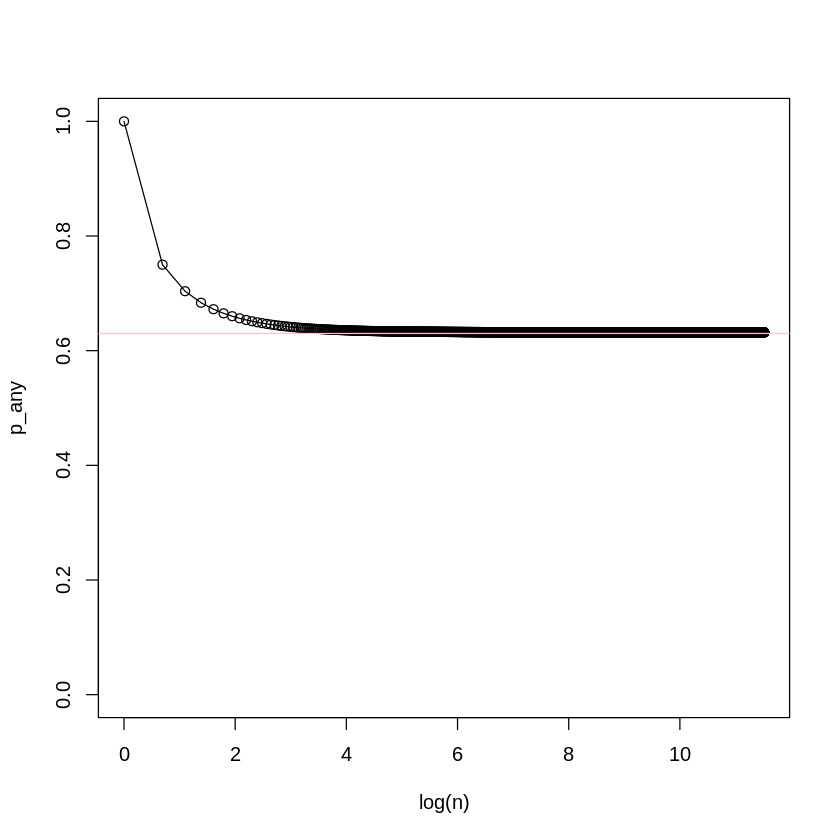

In [ ]:
n <- 1:100000
p_any <- 1-(1 - 1/n)^n

plot(p_any ~ n, type="o", ylim=c(0,1)); abline(h=0.63, col="pink")
plot(p_any ~ log(n), type="o", ylim=c(0,1)); abline(h=0.63, col="pink")

The graph looks cleaner when we set the x-axis to the log scale.  As $n$ increases, $p$ asymtotes at $p=0.63$.

This makes sense because
$$\text{lim}_{n → ∞} \left(1 - \frac{1}{n} \right)^n = \frac{1}{e}$$
such that
$$\text{lim}_{n → ∞} \ 1 - \left(1 - \frac{1}{n} \right)^n = 1 - \frac{1}{e} \approx 1 - \frac{1}{2.71} = 1 - 0.37 = 0.63$$

#### Answer to Question 2 h
***We will now investigate numerically the probability that a bootstrap sample of size $n = 100$ contains the $j^{th}$ observation. Here $j = 4$. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.***

> ```
> store <- rep (NA, 10000)
for (i in 1:10000){
  store[i] <- sum (sample (1:100, rep =TRUE) == 4) > 0
  }
> mean (store)`
```

***Comment on the results obtained.***

In [ ]:
store <- rep (NA, 10000)
for (i in 1:10000){
  store[i] <- sum (sample (1:100, rep =TRUE) == 4) > 0
  }
mean(store)

[1] 0.6299

The $j=4$ observation is included ~ 63% of the time; the theoretical limit we derived in part g.

### Question 3
We now review k-fold cross-validation.

> (a) Explain how k-fold cross-validation is implemented.

> (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:

> > i. The validation set approach?

> > ii. LOOCV?

##### Answer to Question 3, a
***Explain how k-fold cross-validation is implemented.***

1. Data $D$ is divided into $k$ subsets $d$.
2. For each data subset $d_i$, the model is trained on $d_{-i}$ (excluding $d_i$).
3. The parameters estimated from $d_{-i}$, $p_{-i}$, are applied to $d_i$, where the outcome variable in $d_i$, $y_i$, is predicted by applying $p_{-i}$ to the predictor variables of $d_i$, $x_i$.  The error in the resulting predictions is measured and recorded.
4. Models can be compared by comparing their respective error rates across $k$ subsets.

##### Answer to Question 3, b
***What are the advantages and disadvantages of k-fold cross-validation relative to:***
> ***i. The validation set approach?***

> ***ii. LOOCV***

| Approach          | Advantages Compared to k-fold CV                                   | Disadvantages Compared to k-fold CV                      |
|-------------------|---------------------------------------------------------------------|----------------------------------------------------------|
| **Validation Set**| - Simpler and faster to implement                                   | - Higher variance due to reliance on a single split      |
|                   | - Computationally inexpensive                                       | - Inefficient data utilization, leading to less stable results |
|                   |                                                                     | - Higher bias and overfitting risk                       |
|                   |                                                                     | - Less reliable for parameter tuning                     |
| **LOOCV**         | - Uses almost all data for training, low bias                       | - Computationally intensive, especially for large datasets|
|                   | - More stable results as each instance is used for testing once     | - High variance due to single test on each data point    |
|                   | - Lower overfitting risk (less bias)                                            | - Not ideal for parameter tuning due to high variance    |


### Question 4
Suppose that we use some statistical learning method to make a prediction for the response $Y$ for a particular value of the predictor $X$. Carefully describe how we might estimate the standard deviation of our prediction.

#### Answer to Question 4
This answer will depend on the statistical-learning method.  For instance, regression comes with analytical formulas that allow us to estimate the standard deviation of predictions.  But since this chapter is about resampling methods, we should address that. The process would look like:

1. Identify the statistical learning method.
2. Sample the data using one of the methods discussed in the chapter.  Feed the sampled data to the model and record the resulting predictions.
3. Repeat step 2 $m$ times.
4. Calculate the standard deviation across predictions.

## Applied

### Question 5
In Chapter 4, we used logistic regression to predict the probability of `default` using `income` and `balance` on the `Default` data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

> (a) Fit a logistic regression model that uses `income` and `balance` to predict `default`.

> (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

> > i. Split the sample set into a training set and a validation set.

> > ii. Fit a multiple logistic regression model using only the training observations.

> > iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.

> > iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

> (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

> (d) Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.

#### Answers
Loading the data.

In [ ]:
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(Default)
d <- Default
head(d)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


##### Answer to Question 5, a
***Fit a logistic regression model that uses `income` and `balance` to predict `default`.***

In [ ]:
m_logis <- glm(default ~ income*balance,
               family=binomial(link="logit"),
               data=d)
summary(m_logis)


Call:
glm(formula = default ~ income * balance, family = binomial(link = "logit"), 
    data = d)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.092e+01  9.489e-01 -11.504   <2e-16 ***
income          1.600e-06  2.683e-05   0.060    0.952    
balance         5.265e-03  5.648e-04   9.323   <2e-16 ***
income:balance  1.193e-08  1.638e-08   0.728    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1578.4  on 9996  degrees of freedom
AIC: 1586.4

Number of Fisher Scoring iterations: 8


##### Answer to Question 5, b
***Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:***

> > ***i. Split the sample set into a training set and a validation set.***

> > ***ii. Fit a multiple logistic regression model using only the training observations.***

> > ***iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the `default` category if the posterior probability is greater than 0.5.***

> > ***iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.***

In [ ]:
# i. Split the sample set into a training set and a validation set.

train_prop <- 2/3
train_n <- round(nrow(d) * train_prop, 0)
train_ind <- sample(1:nrow(d), size=train_n, replace=FALSE)
d_train <- d[train_ind,]
d_test <- d[-train_ind,]

In [ ]:
# ii. Fit a multiple logistic regression model using only the training observations.

m_train0 <- m_logis <- glm(default ~ income*balance,
                           family=binomial(link="logit"),
                           data=d_train)
summary(m_train1)


Call:
glm(formula = default ~ income * balance, family = binomial(link = "logit"), 
    data = d_train)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.137e+01  1.165e+00  -9.764  < 2e-16 ***
income          1.541e-05  3.216e-05   0.479    0.632    
balance         5.580e-03  6.956e-04   8.021 1.04e-15 ***
income:balance  4.186e-09  1.971e-08   0.212    0.832    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2053.7  on 6666  degrees of freedom
Residual deviance: 1102.6  on 6663  degrees of freedom
AIC: 1110.6

Number of Fisher Scoring iterations: 8


In [ ]:
# iii. Obtain a prediction of default status for each individual in the
  # validation set by computing the posterior probability of default for that
  # individual, and classifying the individual to the default category if the
  # posterior probability is greater than 0.5.

probs0 <- predict(m_train0, newdata=d_test, type="response")
preds0 <- ifelse(probs0 >= 1/2, yes="Yes", no="No")

In [ ]:
# iv. Compute the validation set error, which is the fraction of the
  # observations in the validation set that are misclassified.

table(preds0, d_test$default)

# Two ways to estimate error
## Straight incorrect prediction
pred_err <- round(sum(preds0 != d_test$default) / nrow(d_test),4) * 100
cat(pred_err, "% predictions are incorrect.\n")

# Distance from true result
prcnt_err <- round(mean(ifelse(d_test$default == "Yes",
                        yes = 1-probs0,
                        no = probs0)),4)*100
cat("The average percent error is", prcnt_err, "percentage points. \n \n")

      
preds0   No  Yes
   No  3203   86
   Yes   10   34

2.88 % predictions are incorrect.
The average percent error is 4.36 percentage points. 
 


##### Answer to Question 5, c

***Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.***

In [ ]:
# Define the number of replications
n_replicates <- 10

# Function to perform the analysis
perform_analysis <- function(d) {
  # i. Split the sample set into a training set and a validation set.
  train_prop <- 2 / 3
  train_n <- round(nrow(d) * train_prop)
  train_ind <- sample(nrow(d), size = train_n, replace = FALSE)
  d_train <- d[train_ind, ]
  d_test <- d[-train_ind, ]

  # ii. Fit a multiple logistic regression model using only the training observations.
  m_train0 <- glm(default ~ income * balance, family = binomial(link = "logit"), data = d_train)

  # iii. Obtain a prediction of default status for each individual in the validation set.
  probs0 <- predict(m_train0, newdata = d_test, type = "response")
  preds0 <- ifelse(probs0 >= 0.5, "Yes", "No")

  # iv. Compute the validation set error.
  # Two ways to estimate error:
  # 1. Straight incorrect prediction
  pred_err <- round(sum(preds0 != d_test$default) / nrow(d_test), 4) * 100
  cat(pred_err, "% predictions are incorrect.\n")

  # 2. Distance from true result
  prcnt_err <- round(mean(ifelse(d_test$default == "Yes", 1 - probs0, probs0)), 4) * 100
  cat("The average percent error is", prcnt_err, "percentage points.\n\n")
}

# Loop to replicate the analysis n_replicates times
for (i in 1:n_replicates) {
  perform_analysis(d)
}

2.52 % predictions are incorrect.
The average percent error is 4.28 percentage points.

2.55 % predictions are incorrect.
The average percent error is 4.28 percentage points.

2.55 % predictions are incorrect.
The average percent error is 4.29 percentage points.

2.7 % predictions are incorrect.
The average percent error is 4.37 percentage points.

2.97 % predictions are incorrect.
The average percent error is 4.45 percentage points.

2.73 % predictions are incorrect.
The average percent error is 4.22 percentage points.

2.94 % predictions are incorrect.
The average percent error is 4.41 percentage points.

2.85 % predictions are incorrect.
The average percent error is 4.33 percentage points.

2.19 % predictions are incorrect.
The average percent error is 4.09 percentage points.

2.61 % predictions are incorrect.
The average percent error is 4.42 percentage points.



##### Answer to Question 5, d

***Now consider a logistic regression model that predicts the probability of `default` using `income`, `balance`, and a dummy variable for `student`. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for `student` leads to a reduction in the test error rate.***

In [ ]:
# Define the number of replications
n_replicates <- 10

# Function to perform the analysis
perform_analysis <- function(d) {
  # i. Split the sample set into a training set and a validation set.
  train_prop <- 2 / 3
  train_n <- round(nrow(d) * train_prop)
  train_ind <- sample(nrow(d), size = train_n, replace = FALSE)
  d_train <- d[train_ind, ]
  d_test <- d[-train_ind, ]

  # ii. Fit a multiple logistic regression model using only the training observations.
  m_train0 <- glm(default ~ income * balance * student, family = binomial(link = "logit"), data = d_train)

  # iii. Obtain a prediction of default status for each individual in the validation set.
  probs0 <- predict(m_train0, newdata = d_test, type = "response")
  preds0 <- ifelse(probs0 >= 0.5, "Yes", "No")

  # iv. Compute the validation set error.
  # Two ways to estimate error:
  # 1. Straight incorrect prediction
  pred_err <- round(sum(preds0 != d_test$default) / nrow(d_test), 4) * 100
  cat(pred_err, "% predictions are incorrect.\n")

  # 2. Distance from true result
  prcnt_err <- round(mean(ifelse(d_test$default == "Yes", 1 - probs0, probs0)), 4) * 100
  cat("The average percent error is", prcnt_err, "percentage points.\n\n")
}

# Loop to replicate the analysis n_replicates times
for (i in 1:n_replicates) {
  perform_analysis(d)
}

2.67 % predictions are incorrect.
The average percent error is 4.44 percentage points.

2.76 % predictions are incorrect.
The average percent error is 4.34 percentage points.

2.94 % predictions are incorrect.
The average percent error is 4.6 percentage points.

2.76 % predictions are incorrect.
The average percent error is 4.32 percentage points.

2.79 % predictions are incorrect.
The average percent error is 4.28 percentage points.

2.58 % predictions are incorrect.
The average percent error is 4.16 percentage points.

2.55 % predictions are incorrect.
The average percent error is 4.4 percentage points.

2.43 % predictions are incorrect.
The average percent error is 4.2 percentage points.

2.7 % predictions are incorrect.
The average percent error is 4.28 percentage points.

2.82 % predictions are incorrect.
The average percent error is 4.32 percentage points.



Over 10 runs, adding `student` doesn't seem to make an appreciable difference in error rate.

### Question 6

We continue to consider the use of a logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `glm()` function. Do not forget to set a random seed before beginning your analysis.

> (a) Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.

> (b) Write a function, `boot.fn()`, that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.

> (c) Use the `boot()` function together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for `income` and `balance`.

> (d) Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.

#### Answers

In [ ]:
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(Default)
d <- Default
head(d)

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.625
2,No,Yes,817.1804,12106.135
3,No,No,1073.5492,31767.139
4,No,No,529.2506,35704.494
5,No,No,785.6559,38463.496
6,No,Yes,919.5885,7491.559


##### Answer to Question 6, a
***Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.***

In [ ]:
m_glm <- glm(default ~ income*balance,
             family=binomial(link="logit"),
             data=d)
summary(m_glm)
coef(m_glm)


Call:
glm(formula = default ~ income * balance, family = binomial(link = "logit"), 
    data = d)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.092e+01  9.489e-01 -11.504   <2e-16 ***
income          1.600e-06  2.683e-05   0.060    0.952    
balance         5.265e-03  5.648e-04   9.323   <2e-16 ***
income:balance  1.193e-08  1.638e-08   0.728    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1578.4  on 9996  degrees of freedom
AIC: 1586.4

Number of Fisher Scoring iterations: 8


(Intercept)         income        balance income:balance 
 -1.091573e+01   1.599661e-06   5.265278e-03   1.193329e-08

##### Answer to Question 6, b
***Write a function, `boot.fn()`, that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.***

In [ ]:
boot.fn <- function(dat, indx){
  fit <- glm(default ~ income*balance,
             family=binomial(link="logit"),
             data=dat[indx,])
  coef(fit)
}

boot.fn(d, 1:nrow(d))

(Intercept)         income        balance income:balance 
 -1.091573e+01   1.599661e-06   5.265278e-03   1.193329e-08

##### Answers to Question 6, c and d
***Use the `boot()` function together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for `income` and `balance`.***

\

***Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.***

In [ ]:
#install.packages("boot")
library(boot)

boot(data=d, statistic=boot.fn, R=1000)
summary(m_glm)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.091573e+01 -2.835491e-02 9.119349e-01
t2*  1.599661e-06 -5.675773e-07 2.694173e-05
t3*  5.265278e-03  1.047864e-05 5.479339e-04
t4*  1.193329e-08  4.323389e-10 1.662873e-08


Call:
glm(formula = default ~ income * balance, family = binomial(link = "logit"), 
    data = d)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)    -1.092e+01  9.489e-01 -11.504   <2e-16 ***
income          1.600e-06  2.683e-05   0.060    0.952    
balance         5.265e-03  5.648e-04   9.323   <2e-16 ***
income:balance  1.193e-08  1.638e-08   0.728    0.466    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1578.4  on 9996  degrees of freedom
AIC: 1586.4

Number of Fisher Scoring iterations: 8


The standard errors, as well as the estimates, are similar between the two methods.

### Question 7

In Sections 5.3.2 and 5.3.3, we saw that the `cv.glm()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the `glm()` and `predict.glm()` functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

> (a) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.

> (b) Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using *all but the first observation.*

> (c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P($ `Direction = "Up"|Lag1, Lag2` $) > 0.5$. Was this observation correctly classified?

> (d) Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:

>> i. Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.

>> ii. Compute the posterior probability of the market moving up for the ith observation.

>> iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.

>> iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

> (e) Take the average of the $n$ numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

#### Answers

In [ ]:
install.packages("ISLR2")
library(ISLR2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(Weekly)
d <- Weekly
head(d)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


##### Answer to Question 7, a
***Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`.***

In [ ]:
m1 <- glm(Direction ~ Lag1 + Lag2,
          family=binomial(link="logit"),
          data=d)

##### Answer to Question 7, b
***Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using <u>all but the first observation</u>.***

In [ ]:
d_train <- d[-1,]
d_test <- d[1,]

m2 <- glm(Direction ~ Lag1 + Lag2,
          family=binomial(link="logit"),
          data=d_train)

##### Answer to Question 7, c
***Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P($ `Direction = "Up"|Lag1, Lag2` $) > 0.5$. Was this observation correctly classified?***

In [ ]:
m2_predict <- predict(m2, newdata=d_test, type="response")
m2_predict
ifelse(m2_predict >= 0.5, "Up", "Down") == d[1,"Direction"]

1 
0.5713923

[1] FALSE

##### Answer to Question 7, d
***Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:***

> ***i. Fit a logistic regression model using all but the ith observation to predict `Direction` using `Lag1` and `Lag2`.***

> ***ii. Compute the posterior probability of the market moving up for the ith observation.***

> ***iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.***

> ***iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.***

In [ ]:
results <- logical(length=nrow(d))

for(i in 1:nrow(d)){
  d_train <- d[-i,]
  d_test <- d[i,]

  mi <- glm(Direction ~ Lag1 + Lag2,
            family=binomial(link="logit"),
            data=d_train)

  mi_predict <- predict(mi, newdata=d_test, type="response")
  results[i] <- ifelse(mi_predict >= 0.5, "Up", "Down") == d[i,"Direction"]
}

##### Answer to Question 7, e
***Take the average of the $n$ numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.***

In [ ]:
head(results)
(test_err <- 1 - sum(results) / length(results))

[1] FALSE FALSE  TRUE FALSE  TRUE FALSE

[1] 0.4499541

So the error rate $\approx 45\%$, slightly better than random guessing.

### Question 8

We will now perform cross-validation on a simulated data set.

> (a) Generate a simulated data set as follows:

> ```
set.seed(1)
x <- rnorm (100)
y <- x - 2 * x^2 + rnorm (100)
```

> In this data set, what is `n` and what is `p`? Write out the model used to generate the data in equation form.

> (b) Create a scatterplot of $X$ against $Y$. Comment on what you find.

> (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

> > i. $Y = β_0 + β_1 X + ϵ$

> > ii. $Y = β_0 + β_1 X + β_2 X_2 + ϵ$

> > iii. $Y = β_0 + β_1 X + β_2 X_2 + β_3 X_3 + ϵ$

> > iv. $Y = β_0 + β_1 X + β_2 X_2 + β_3 X_3 + β_4 X_4 + ϵ$

> Note you may find it helpful to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.

> (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

> (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

> (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

#### Answer to Question 8, a

***Generate a simulated data set as follows:***

> ```
set.seed(1)
x <- rnorm (100)
y <- x - 2 * x^2 + rnorm (100)
```

***In this data set, what is `n` and what is `p`? Write out the model used to generate the data in equation form.***

In [ ]:
set.seed(1)

n <- 100
x <- rnorm(n)
y <- x - 2*x^2 + rnorm(n)

$n$ is 100, which is the the first argument in the `rnorm()` command.
$p$ is 2, the number of non-random components in `y`.

#### Answer to Question 8, b

***Create a scatterplot of $X$ against $Y$. Comment on what you find.***

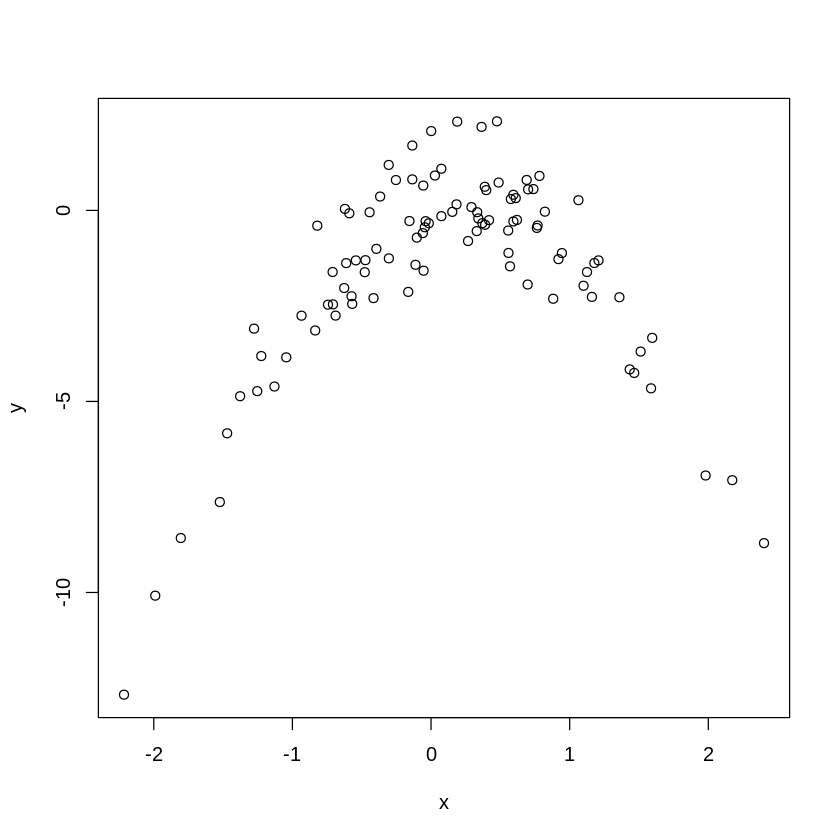

In [ ]:
plot(y ~ x)

Since we have an $x^2$ term as the highest order term in our expression for $y$, we predictably have a parabolic relationship between $x$ and $y$.

#### Answer to Question 8, c

***Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:***

> ***i. $Y = β_0 + β_1 X + ϵ$***

> ***ii. $Y = β_0 + β_1 X + β_2 X^2 + ϵ$***

> ***iii. $Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ϵ$***

> ***iv. $Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + β_4 X^4 + ϵ$***

***Note you may find it helpful to use the `data.frame()` function to create a single data set containing both $X$ and $Y$.***

In [ ]:
install.packages("boot")
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



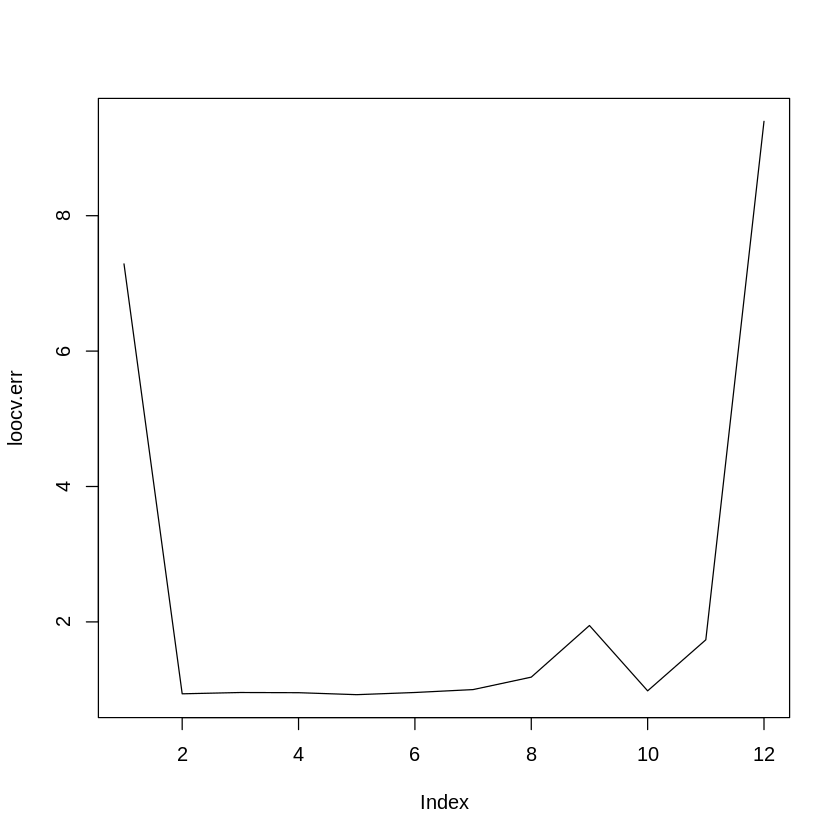

In [ ]:
set.seed(1)

d <- data.frame(x=x, y=y)

loocv.err <- numeric(length=12)
summaries <- list()

for(i in 1:12){
  fit <- glm(y ~ poly(x, degree=i, raw=TRUE))
  summaries[[i]] <- summary(fit)
  loocv.err[i] <- cv.glm(data=d, glmfit=fit)$delta[1]
}

plot(loocv.err, type="l")

I've taken this many more polynomial terms in order to see the cv error increase.

#### Answer to Question 8, d

***Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?***

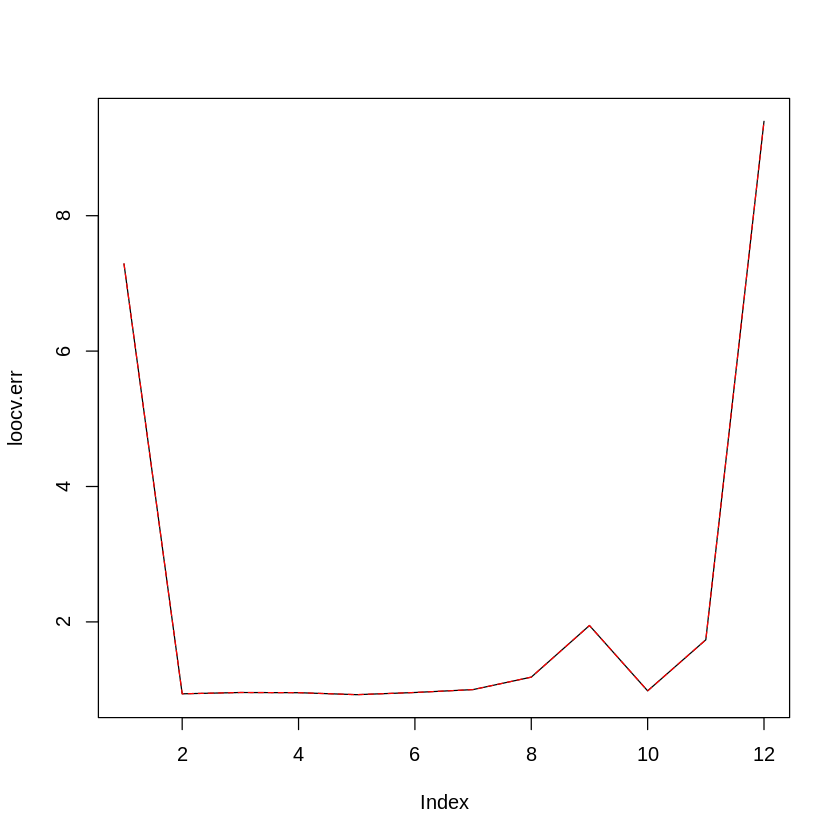

In [ ]:
set.seed(2)

d <- data.frame(x=x, y=y)

loocv.err2 <- numeric(length=12)

for(i in 1:12){
  fit2 <- glm(y ~ poly(x, degree=i, raw=TRUE))
  loocv.err2[i] <- cv.glm(data=d, glmfit=fit)$delta[1]
}

plot(loocv.err, type="l")
lines(loocv.err2, type="l", lty=2, col="red")

The two seeds yield the same results.  Why?  Because the code, `glm()` and `cv.glm(K=nrow(d))` admits no randomness: `glm()` is a determinisitc calculation, and loocv has no randomness in the partitioning of data subsets (if data subsets > 1, then we should see slight differences).

#### Answer to Question 8, e

***Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.***

In [ ]:
order(loocv.err)

[1]  5  2  4  3  6 10  7  8 11  9  1 12

Importantly, the non-polynomial model does among the worst and gets marketly better upon adding quadratic term; this is expected given the non-linear (quadratic) nature of the data.

On this particular run of fake data, the 5th-degree polynomial model has the lowest error--followed closely by the 2nd-4th degree polynomial models; this may change if you rerun the code.  This may seem unexpected, but these models are basically tied.

#### Answer to Question 8, f

***Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?***

In [ ]:
summaries

[[1]]

Call:
glm(formula = y ~ poly(x, degree = i, raw = TRUE))

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -1.6254     0.2619  -6.205 1.31e-08 ***
poly(x, degree = i, raw = TRUE)   0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2


[[2]]

Call:
glm(formula = y ~ poly(x, degree = i, raw = TRUE))

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       0.05672    0.11766   0.482    0.631    
poly(x, degree = i, raw = TRUE)1  1.01716    0.10798   9.420  2.4e-15 ***
poly(x, degree = i, raw = TRUE)2 -2.11892    0.08477 -24.997  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 

Remember that we generated data as `y <- x - 2*x^2 + rnorm(n)`. In other words, we've defined an intercept (=0), a coefficient for `x` (=1), and a coefficient for `x^2` (=-2).  Once we have at least `x` and `x^2` in our model, these estimates are made across models and p-values for them (and only them) are consistently low.

### Question 9

We will now consider the `Boston` housing data set, from the `ISLR2` library.

> (a) Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{\mu}$.

> (b) Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.

> > *Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.*

> (c) Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

> (d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained using `t.test(Boston$medv)`.

> > *Hint: You can approximate a 95% confidence interval using the formula $[\hat{\mu} − 2\text{SE}(\hat{\mu}), \ \hat{\mu} + 2\text{SE}(\hat{\mu})]$.*

> (e) Based on this data set, provide an estimate, $\hat{\mu}_{med}$, for the median value of `medv` in the population.

> (f) We now would like to estimate the standard error of $\hat{\mu}_{med}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

> (g) Based on this data set, provide an estimate for the tenth percentile of `medv` in Boston census tracts. Call this quantity $\hat{\mu}_{0.1}$. (You can use the `quantile()` function.)

> (h) Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

#### Answers

In [2]:
install.packages("ISLR2")
library(ISLR2)

install.packages("boot")
library(boot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
data(Boston)
d <- Boston
head(d)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


##### Answer to Question 9, a

***Based on this data set, provide an estimate for the population mean of `medv`. Call this estimate $\hat{\mu}$.***

In [9]:
(mu <- mean(d$medv))

[1] 22.53281

##### Answer to Question 9, b

***Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.***

> ***Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.***

In [10]:
(SE <- sd(d$medv) / sqrt(nrow(d)))

[1] 0.4088611

##### Answer to Question 9, c

***Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?***

In [11]:
(bs_SE <- boot(d$medv, function(x, i) mean(x[i]), 1000))


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d$medv, statistic = function(x, i) mean(x[i]), R = 1000)


Bootstrap Statistics :
    original      bias    std. error
t1* 22.53281 -0.01205277   0.4032868

##### Answer to Question 9, d

***Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained using `t.test(Boston$medv)`.***

> ***Hint: You can approximate a 95% confidence interval using the formula $[\hat{\mu} − 2\text{SE}(\hat{\mu}), \ \hat{\mu} + 2\text{SE}(\hat{\mu})]$.***